In [21]:
import pandas as pd
import psycopg2
import numpy as np
import matplotlib
from connect import cursor
import seaborn as sns
import matplotlib.pyplot as plt

# *Conectar a la base de datos PostgreSQL*

In [22]:
# datos de conexión
dbname = 'postgres'
user = 'postgres'
password = 'ozZpSSXJxNiYbBo6KiLM'
host = 'pfyeld.csogvboudl4p.us-east-2.rds.amazonaws.com'  # endpoint de la base de datos en AWS
port = '5432'  

In [23]:
connection = None
cursor = None

In [24]:
# Conexión a la base de datos
conn = psycopg2.connect(dbname=dbname, user=user, password=password, host=host, port=port)

# Crear un cursor
cursor = conn.cursor()

# *Ejecutar consultas SQL y cargar datos en un DataFrame de pandas:*

In [27]:

# Ejecutar una consulta SQL
query = "SELECT * FROM usa_cities;"
cursor.execute(query)

# Obtener los resultados y cargarlos en un DataFrame de pandas
column_names = [desc[0] for desc in cursor.description]
df = pd.DataFrame(cursor.fetchall(), columns=column_names)

# *Realizar análisis de datos con pandas y matplotlib:*

In [28]:
df.head()

,city_id,city,county,state_id,population,density,latitude,longitude,zips,geometry
0,1,New York,Queens,NY,18908608,11226.2,40.6943,-73.9249,[11229 11228 11226 11225 11224 11222 11221 112...,[POINT (-73.94343119226887 40.669903385553056)]
1,2,Los Angeles,Los Angeles,CA,11922389,3202.3,34.1141,-118.4068,[91367 90291 90293 90292 91316 91311 90035 900...,[POINT (-118.41211392839487 34.11210884430981)]
2,3,Chicago,Cook,IL,8497759,4648.7,41.8375,-87.6866,[60018 60649 60641 60640 60643 60642 60645 606...,[POINT (-87.68501821557464 41.837082841091316)]
3,4,Miami,Miami-Dade,FL,6080145,4728.2,25.784,-80.2101,[33128 33129 33125 33126 33127 33149 33144 331...,[POINT (-80.21061554370905 25.776043835020747)]
4,5,Houston,Harris,TX,5970127,1382.2,29.786,-95.3885,[77069 77068 77061 77060 77063 77062 77065 770...,[POINT (-95.38694447527584 29.768927923193075)]


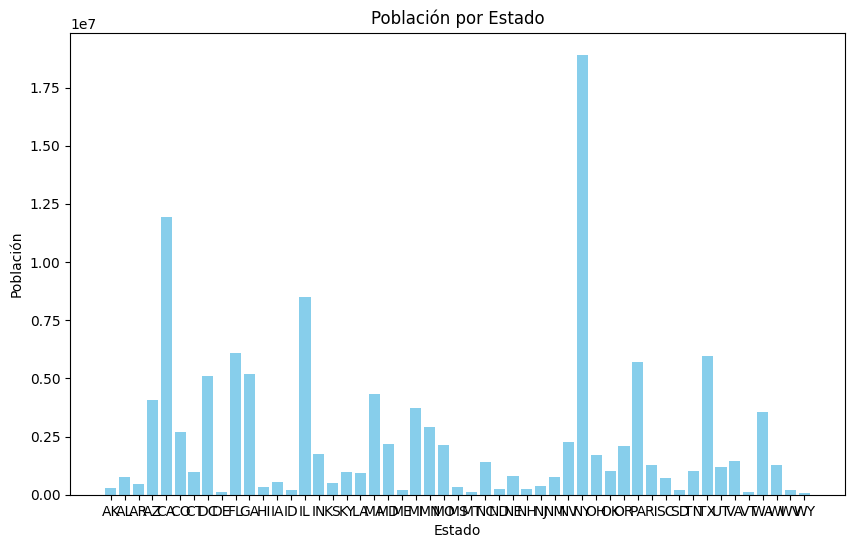

In [29]:
df = df.sort_values(by='state_id')

# Crea el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df['state_id'], df['population'], color='skyblue')
plt.title('Población por Estado')
plt.xlabel('Estado')
plt.ylabel('Población')
plt.show()

# *Cerrar la conexión cuando hayas terminado:*

In [ ]:
# Cerrar el cursor y la conexión
cursor.close()
conn.close()